In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime

In [2]:
df1 = pd.read_csv("accidents_2012_to_2014.csv")
df2 = pd.read_csv("accidents_2009_to_2011.csv")
df3 = pd.read_csv("accidents_2005_to_2007.csv")

In [3]:
df1.columns == df3.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [4]:
df=pd.concat([df1,df2,df3],axis=0)

In [5]:
df.shape

(1504150, 33)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,1504049.0,439621.405078,95116.160326,64950.000000,375060.000000,439960.000000,523060.000000,6.553700e+05
Location_Northing_OSGR,1504049.0,300158.403995,161008.382735,10290.000000,178260.000000,268830.000000,398151.000000,1.208800e+06
Longitude,1504049.0,-1.436625,1.398078,-7.516225,-2.373902,-1.403714,-0.221510,1.759398e+00
Latitude,1504049.0,52.589399,1.449889,49.912941,51.490156,52.309126,53.478581,6.075754e+01
Police_Force,1504150.0,30.205364,25.516033,1.000000,6.000000,30.000000,45.000000,9.800000e+01
Accident_Severity,1504150.0,2.838190,0.401842,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,1504150.0,1.831606,0.714759,1.000000,1.000000,2.000000,2.000000,6.700000e+01
Number_of_Casualties,1504150.0,1.350960,0.825335,1.000000,1.000000,1.000000,1.000000,9.300000e+01
Day_of_Week,1504150.0,4.118607,1.924405,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),1504150.0,347.614855,259.429163,1.000000,110.000000,322.000000,518.000000,9.410000e+02


In [7]:
df.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [8]:
df.drop(["Junction_Detail","Junction_Control","LSOA_of_Accident_Location"],inplace=True,axis=1)

In [9]:
df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                           101
Location_Northing_OSGR                          101
Longitude                                       101
Latitude                                        101
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                            117
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Num

In [10]:
df.dropna(axis=0,inplace=True)

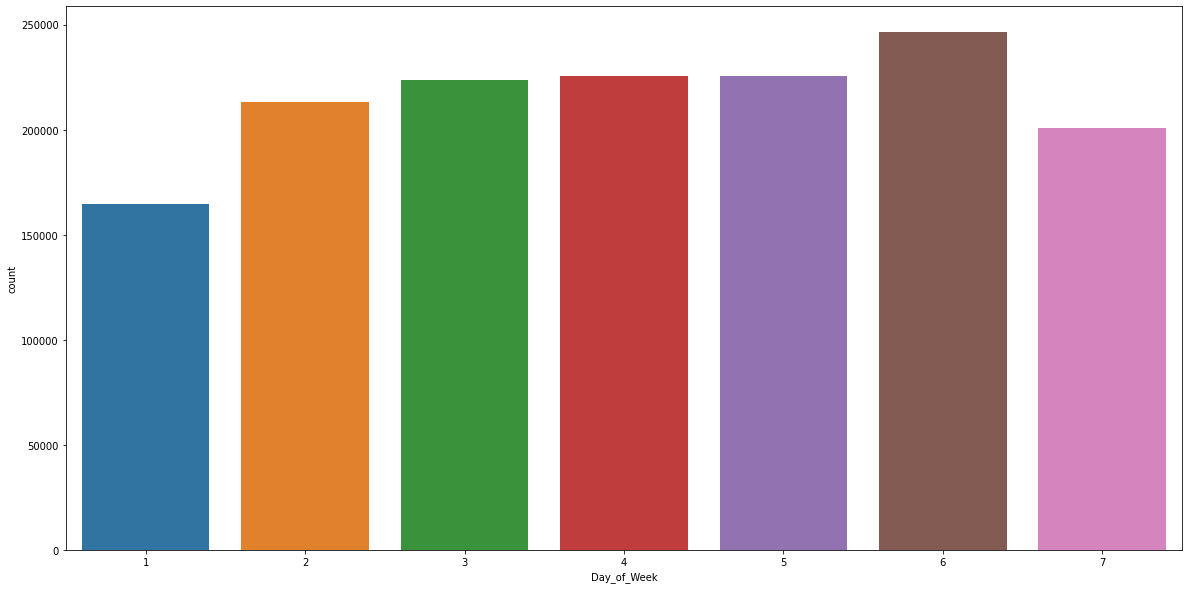

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x='Day_of_Week',data=df)
plt.show()

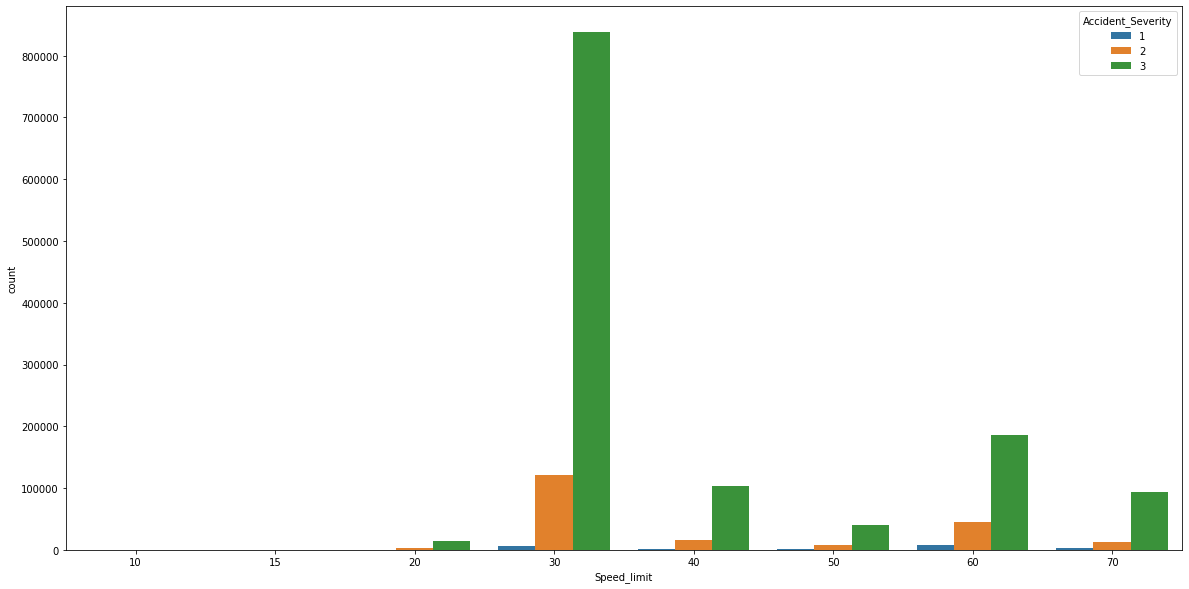

In [139]:
plt.figure(figsize=(20,10))
sns.countplot(x='Speed_limit',data=df,hue="Accident_Severity")
plt.show()

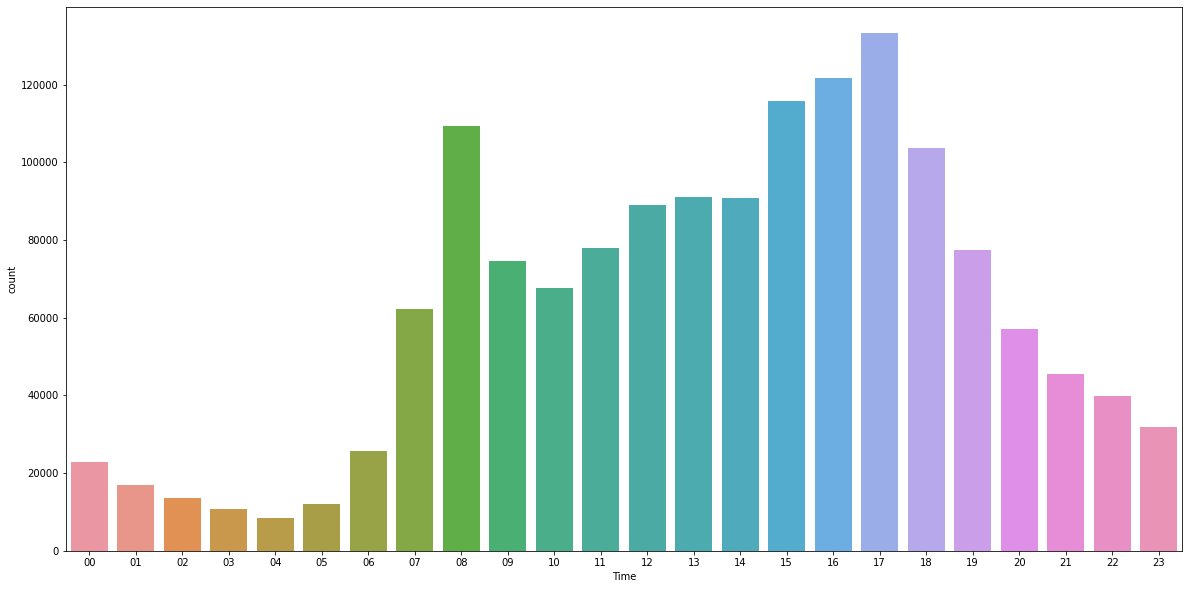

In [125]:
plt.figure(figsize=(20,10))
sns.countplot(x=pd.to_datetime(df.Time, utc=True, infer_datetime_format=True).dt.strftime("%H"),order=["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23"])
plt.show()

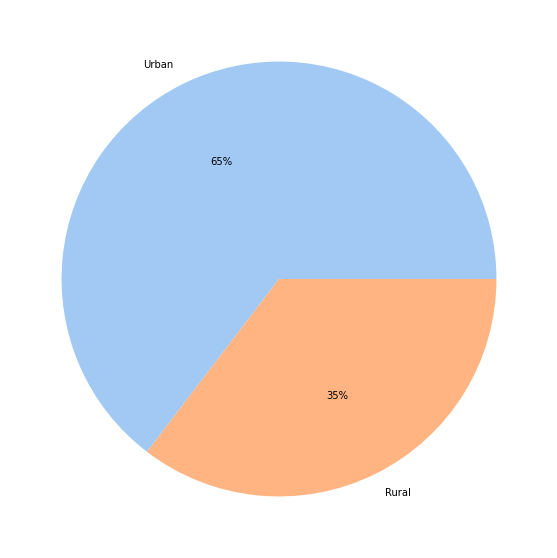

In [159]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('pastel')[0:5]
labels = ['Urban', 'Rural']
plt.pie(df.Urban_or_Rural_Area.value_counts()[:2].values, colors = colors,labels = labels, autopct='%.0f%%')
plt.show()

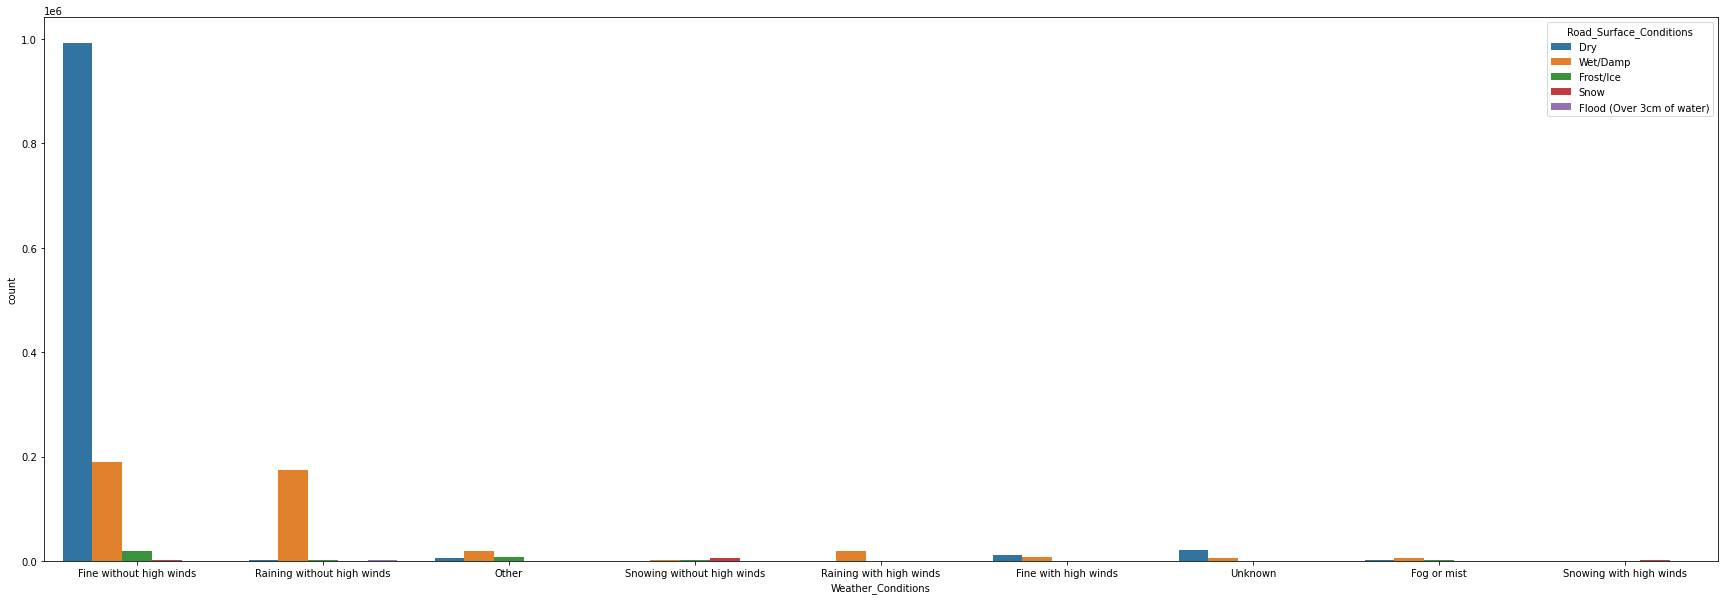

In [183]:
plt.figure(figsize=(30,10))
sns.countplot(x='Weather_Conditions',data=df,hue="Road_Surface_Conditions")
plt.show()